# Neural Radiance Field (NeRF)

https://github.com/MaximeVandegar/Papers-in-100-Lines-of-Code/tree/main/NeRF_Representing_Scenes_as_Neural_Radiance_Fields_for_View_Synthesis

## Data

Download the dataset from [Google Drive](https://drive.google.com/drive/folders/18bwm-RiHETRCS5yD9G00seFIcrJHIvD-?usp=sharing) or [Hugging Face](https://huggingface.co/datasets/mingyujeon/nerf/tree/main)
```
training_data.pkl
test_data.pkl
```

Run the code
`python 36_nerf.py`

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from tqdm import tqdm
from IPython.display import HTML

In [ ]:
training_dataset = np.load('training_data.pkl', allow_pickle=True)
testing_dataset = np.load('testing_data.pkl', allow_pickle=True)

In [ ]:
training_dataset.shape

(16000000, 9)

In [ ]:
testing_dataset.shape

(32000000, 9)

batch.shape (160000, 9)
img.shape (400, 400, 3)
ray_origins
[[1.136807  2.9388874 2.5140824]
 [1.136807  2.9388874 2.5140824]
 [1.136807  2.9388874 2.5140824]
 ...
 [1.136807  2.9388874 2.5140824]
 [1.136807  2.9388874 2.5140824]
 [1.136807  2.9388874 2.5140824]]
ray_directions
[[-0.02428393 -0.9520411  -0.3050051 ]
 [-0.02579327 -0.95195115 -0.3051618 ]
 [-0.02730404 -0.95185894 -0.30531794]
 ...
 [-0.47518525 -0.3507344  -0.8069599 ]
 [-0.4764413  -0.349976   -0.8065485 ]
 [-0.47769496 -0.34921753 -0.8061356 ]]


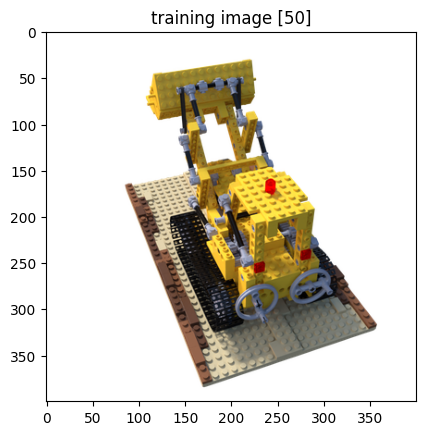

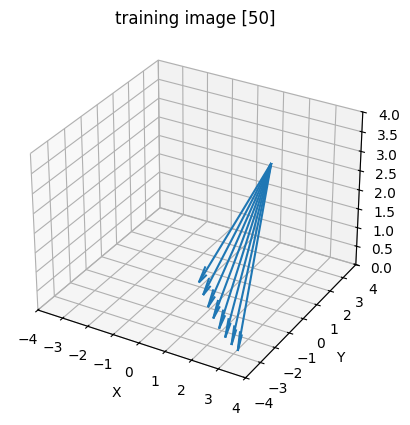

In [ ]:
idx = 50
H=400
W=400
batch = training_dataset[idx * H * W : (idx + 1) * H * W]
print('batch.shape', batch.shape)
ray_origins = batch[:, :3]
ray_directions = batch[:, 3:6]
ground_truth_px_values = batch[:, 6:9]
img = ground_truth_px_values.reshape(H, W, 3)
print('img.shape', img.shape)

print('ray_origins')
print(ray_origins)

print('ray_directions')
print(ray_directions)

plt.figure()
plt.imshow(img)
plt.title(f'training image [{idx}]')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ss = 20000
ax.quiver(ray_origins[:, 0][::ss], ray_origins[:, 1][::ss], ray_origins[:, 2][::ss],
          ray_directions[:, 0][::ss], ray_directions[:, 1][::ss], ray_directions[:, 2][::ss],
          length=5, normalize=True, arrow_length_ratio=0.1)
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_zlim(0, 4)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title(f'training image [{idx}]')
plt.show()

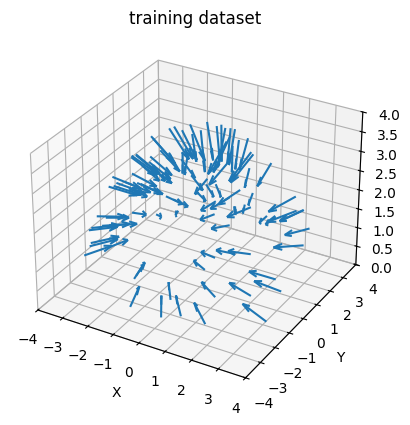

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_zlim(0, 4)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

for i in range(int(training_dataset.shape[0] / (H * W))):
  batch = training_dataset[i * H * W : (i + 1) * H * W]
  ray_origins = batch[:, :3]
  ray_directions = batch[:, 3:6]
  ax.quiver(
    ray_origins[0][0],
    ray_origins[0][1],
    ray_origins[0][2],
    ray_directions[0][0],
    ray_directions[0][1],
    ray_directions[0][2],
    length=1, normalize=True
  )

plt.title('training dataset')
plt.show()     

batch.shape (160000, 9)
img.shape (400, 400, 3)
ray_origins
[[-2.7687545  0.8996221  2.788311 ]
 [-2.7687545  0.8996221  2.788311 ]
 [-2.7687545  0.8996221  2.788311 ]
 ...
 [-2.7687545  0.8996221  2.788311 ]
 [-2.7687545  0.8996221  2.788311 ]
 [-2.7687545  0.8996221  2.788311 ]]
ray_directions
[[ 0.9222659   0.03766311 -0.38471678]
 [ 0.9222438   0.03615611 -0.38491446]
 [ 0.9222195   0.03464747 -0.38511142]
 ...
 [ 0.3050673  -0.4320694  -0.8486754 ]
 [ 0.30441532 -0.43337703 -0.8482427 ]
 [ 0.30376327 -0.4346823  -0.8478084 ]]


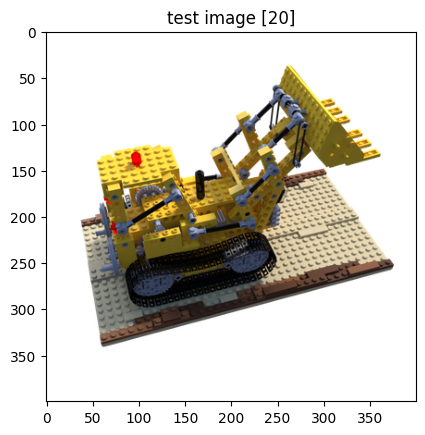

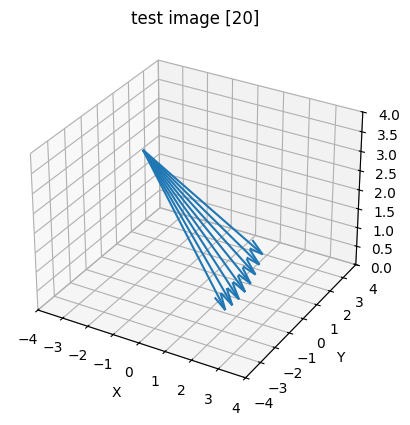

In [ ]:
idx = 20
H=400
W=400
batch = testing_dataset[idx * H * W : (idx + 1) * H * W]
print('batch.shape', batch.shape)
ray_origins = batch[:, :3]
ray_directions = batch[:, 3:6]
ground_truth_px_values = batch[:, 6:9]
img = ground_truth_px_values.reshape(H, W, 3)
print('img.shape', img.shape)

print('ray_origins')
print(ray_origins)

print('ray_directions')
print(ray_directions)

plt.figure()
plt.imshow(img)
plt.title(f'test image [{idx}]')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ss = 20000
ax.quiver(ray_origins[:, 0][::ss], ray_origins[:, 1][::ss], ray_origins[:, 2][::ss],
          ray_directions[:, 0][::ss], ray_directions[:, 1][::ss], ray_directions[:, 2][::ss],
          length=5, normalize=True, arrow_length_ratio=0.1)
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_zlim(0, 4)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title(f'test image [{idx}]')
plt.show()

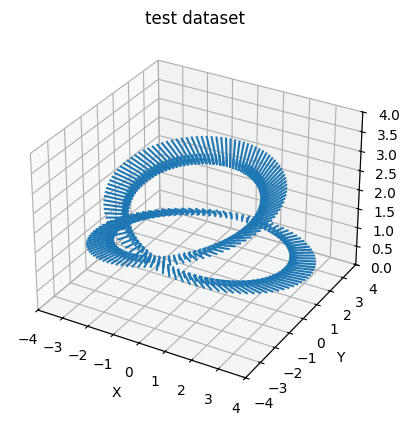

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_zlim(0, 4)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

for i in range(int(testing_dataset.shape[0] / (H * W))):
  batch = testing_dataset[i * H * W : (i + 1) * H * W]
  ray_origins = batch[:, :3]
  ray_directions = batch[:, 3:6]
  ax.quiver(
    ray_origins[0][0],
    ray_origins[0][1],
    ray_origins[0][2],
    ray_directions[0][0],
    ray_directions[0][1],
    ray_directions[0][2],
    length=1, normalize=True
  )
plt.title(f'test dataset')
plt.show()     

In [ ]:
img_list = []
for i in range(int(testing_dataset.shape[0] / (H * W))):
  batch = testing_dataset[i * H * W : (i + 1) * H * W]
  ground_truth_px_values = batch[:, 6:9]
  img = ground_truth_px_values.reshape(H, W, 3)
  img_list.append(img)

In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(img_list[0])

def update(frame):
    im.set_array(frame)
    return [im]

ani = FuncAnimation(fig, update, frames=img_list, interval=50, blit=True)
plt.close()
# HTML(ani.to_jshtml())
ani.save('test_dataset.mp4', fps=30)

## Pre-trained Model

Train your own model or download the pre-trained model from [Hugging Face](https://huggingface.co/datasets/mingyujeon/nerf/blob/main/model.pth)

```
model.pth
```

In [ ]:
import torch
import torch.nn as nn

class NerfModel(nn.Module):
    def __init__(self, embedding_dim_pos=10, embedding_dim_direction=4, hidden_dim=128):   
        super(NerfModel, self).__init__()
        
        self.block1 = nn.Sequential(nn.Linear(embedding_dim_pos * 6 + 3, hidden_dim), nn.ReLU(),
                                    nn.Linear(hidden_dim, hidden_dim), nn.ReLU(),
                                    nn.Linear(hidden_dim, hidden_dim), nn.ReLU(),
                                    nn.Linear(hidden_dim, hidden_dim), nn.ReLU(), )
        # density estimation
        self.block2 = nn.Sequential(nn.Linear(embedding_dim_pos * 6 + hidden_dim + 3, hidden_dim), nn.ReLU(),
                                    nn.Linear(hidden_dim, hidden_dim), nn.ReLU(),
                                    nn.Linear(hidden_dim, hidden_dim), nn.ReLU(),
                                    nn.Linear(hidden_dim, hidden_dim + 1), )
        # color estimation
        self.block3 = nn.Sequential(nn.Linear(embedding_dim_direction * 6 + hidden_dim + 3, hidden_dim // 2), nn.ReLU(), )
        self.block4 = nn.Sequential(nn.Linear(hidden_dim // 2, 3), nn.Sigmoid(), )

        self.embedding_dim_pos = embedding_dim_pos
        self.embedding_dim_direction = embedding_dim_direction
        self.relu = nn.ReLU()

    @staticmethod
    def positional_encoding(x, L):
        out = [x]
        for j in range(L):
            out.append(torch.sin(2 ** j * x))
            out.append(torch.cos(2 ** j * x))
        return torch.cat(out, dim=1)

    def forward(self, o, d):
        emb_x = self.positional_encoding(o, self.embedding_dim_pos) # emb_x: [batch_size, embedding_dim_pos * 6]
        emb_d = self.positional_encoding(d, self.embedding_dim_direction) # emb_d: [batch_size, embedding_dim_direction * 6]
        h = self.block1(emb_x) # h: [batch_size, hidden_dim]
        tmp = self.block2(torch.cat((h, emb_x), dim=1)) # tmp: [batch_size, hidden_dim + 1]
        h, sigma = tmp[:, :-1], self.relu(tmp[:, -1]) # h: [batch_size, hidden_dim], sigma: [batch_size]
        h = self.block3(torch.cat((h, emb_d), dim=1)) # h: [batch_size, hidden_dim // 2]
        c = self.block4(h) # c: [batch_size, 3]
        return c, sigma
    
def compute_accumulated_transmittance(alphas):
    accumulated_transmittance = torch.cumprod(alphas, 1)
    return torch.cat((torch.ones((accumulated_transmittance.shape[0], 1), device=alphas.device),
                      accumulated_transmittance[:, :-1]), dim=-1)


def render_rays(nerf_model, ray_origins, ray_directions, hn=0, hf=0.5, nb_bins=192):
    device = ray_origins.device
    
    t = torch.linspace(hn, hf, nb_bins, device=device).expand(ray_origins.shape[0], nb_bins)
    # Perturb sampling along each ray.
    mid = (t[:, :-1] + t[:, 1:]) / 2.
    lower = torch.cat((t[:, :1], mid), -1)
    upper = torch.cat((mid, t[:, -1:]), -1)
    u = torch.rand(t.shape, device=device)
    t = lower + (upper - lower) * u  # [batch_size, nb_bins]
    delta = torch.cat((t[:, 1:] - t[:, :-1], torch.tensor([1e10], device=device).expand(ray_origins.shape[0], 1)), -1)

    # Compute the 3D points along each ray
    x = ray_origins.unsqueeze(1) + t.unsqueeze(2) * ray_directions.unsqueeze(1)   # [batch_size, nb_bins, 3]
    # Expand the ray_directions tensor to match the shape of x
    ray_directions = ray_directions.expand(nb_bins, ray_directions.shape[0], 3).transpose(0, 1) 

    colors, sigma = nerf_model(x.reshape(-1, 3), ray_directions.reshape(-1, 3))
    colors = colors.reshape(x.shape)
    sigma = sigma.reshape(x.shape[:-1])

    alpha = 1 - torch.exp(-sigma * delta)  # [batch_size, nb_bins]
    weights = compute_accumulated_transmittance(1 - alpha).unsqueeze(2) * alpha.unsqueeze(2)
    # Compute the pixel values as a weighted sum of colors along each ray
    c = (weights * colors).sum(dim=1)
    weight_sum = weights.sum(-1).sum(-1)  # Regularization for white background 
    return c + 1 - weight_sum.unsqueeze(-1)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
checkpoint = torch.load('model.pth', map_location=device)

In [ ]:
model = NerfModel(hidden_dim=256).to(device)
model.load_state_dict(checkpoint)

<All keys matched successfully>

100%|██████████| 40/40 [00:03<00:00, 10.71it/s]


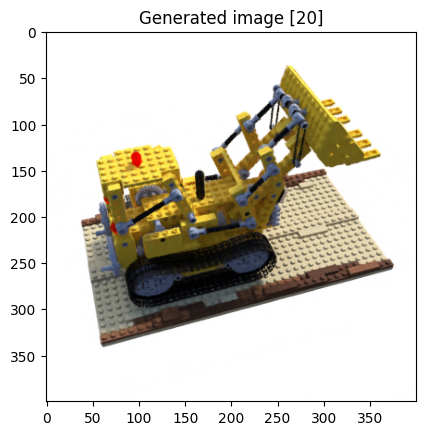

In [ ]:
img_index = 20
chunk_size = 10
H = 400
W = 400
dataset = torch.from_numpy(testing_dataset).to(device)
ray_origins = dataset[img_index * H * W: (img_index + 1) * H * W, :3]
ray_directions = dataset[img_index * H * W: (img_index + 1) * H * W, 3:6]

data = []   # list of regenerated pixel values
for i in tqdm(range(int(np.ceil(H / chunk_size)))):   # iterate over chunks
    # Get chunk of rays
    ray_origins_ = ray_origins[i * W * chunk_size: (i + 1) * W * chunk_size].to(device)
    ray_directions_ = ray_directions[i * W * chunk_size: (i + 1) * W * chunk_size].to(device)        
    with torch.inference_mode():
        regenerated_px_values = render_rays(model, ray_origins_, ray_directions_, hn=2, hf=6, nb_bins=192)
    data.append(regenerated_px_values)
img = torch.cat(data).data.cpu().numpy().reshape(H, W, 3)
# print(np.min(img), np.max(img))
img = np.clip(img, 0, 1)

plt.figure()
plt.imshow(img)
plt.title(f'Generated image [{img_index}]')
plt.show()

In [ ]:
img_list = []

for img_index in range(0, 10):
    chunk_size = 10
    H = 400
    W = 400
    dataset = torch.from_numpy(testing_dataset).to(device)
    ray_origins = dataset[img_index * H * W: (img_index + 1) * H * W, :3]
    ray_directions = dataset[img_index * H * W: (img_index + 1) * H * W, 3:6]

    data = []   # list of regenerated pixel values
    for i in tqdm(range(int(np.ceil(H / chunk_size)))):   # iterate over chunks
        # Get chunk of rays
        ray_origins_ = ray_origins[i * W * chunk_size: (i + 1) * W * chunk_size].to(device)
        ray_directions_ = ray_directions[i * W * chunk_size: (i + 1) * W * chunk_size].to(device)        
        with torch.inference_mode():
            regenerated_px_values = render_rays(model, ray_origins_, ray_directions_, hn=2, hf=6, nb_bins=192)
        data.append(regenerated_px_values)
    img = torch.cat(data).data.cpu().numpy().reshape(H, W, 3)
    # print(np.min(img), np.max(img))
    img = np.clip(img, 0, 1)
    img_list.append(img)

    # plt.figure()
    # plt.imshow(img)
    # plt.title(f'Generated image [{img_index}]')
    # plt.show()

100%|██████████| 40/40 [00:03<00:00, 10.68it/s]


In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(img_list[0])

def update(frame):
    im.set_array(frame)
    return [im]

ani = FuncAnimation(fig, update, frames=img_list, interval=50, blit=True)
plt.close()
# HTML(ani.to_jshtml())
ani.save('generated_images.mp4', fps=30)